## On Iris Dataset

In [ ]:
%pip install scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = load_iris()
X = data.data
X_scaled = StandardScaler().fit_transform(X)

MSE of PCA Reconstruction: 0.0419


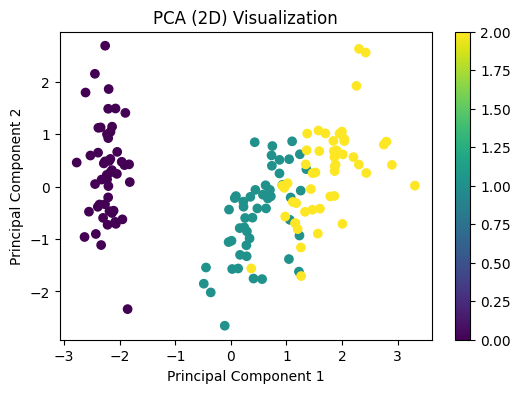

In [5]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_reconstructed = pca.inverse_transform(X_pca)
mse_pca = mean_squared_error(X_scaled, X_pca_reconstructed)
print(f"MSE of PCA Reconstruction: {mse_pca:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='viridis')
plt.title("PCA (2D) Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MSE of Autoencoder Reconstruction: 0.3741


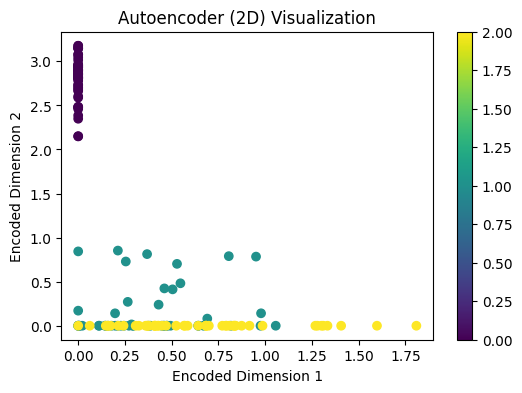

In [6]:
# Autoencoder
autoencoder = Sequential([
    Dense(2, activation='relu', input_shape=(4,)), 
    Dense(4, activation='linear')                   
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)

encoder = Sequential(autoencoder.layers[:1])
X_encoded = encoder.predict(X_scaled)
X_ae_reconstructed = autoencoder.predict(X_scaled)

mse_ae = mean_squared_error(X_scaled, X_ae_reconstructed)
print(f"MSE of Autoencoder Reconstruction: {mse_ae:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=data.target, cmap='viridis')
plt.title("Autoencoder (2D) Visualization")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.colorbar()
plt.show()


## Taking input as shapes

### Circle 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

def circle(r, θ):
    x = r * np.cos(θ)
    y = r * np.sin(θ)
    return x, y

train = []
for i in range(1000):
    θ = np.random.uniform(0, 2*np.pi)
    r = 5
    # r = np.random.randn()
    x, y = circle(r, θ)
    train.append([x, y])

X = np.array(train)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
X_pca_reconstructed = pca.inverse_transform(X_pca)
pca_mse = mean_squared_error(X_scaled, X_pca_reconstructed)
print(f"PCA Reconstruction MSE: {pca_mse:.6f}")

PCA Reconstruction MSE: 0.486117


In [17]:
autoencoder = Sequential([
    Dense(1, activation='relu', input_shape=(2,)),  
    Dense(2)                                        
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, verbose=0)

X_autoencoded = autoencoder.predict(X_scaled)
ae_mse = mean_squared_error(X_scaled, X_autoencoded)
print(f"Autoencoder Reconstruction MSE: {ae_mse:.6f}")

c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Autoencoder Reconstruction MSE: 0.512491


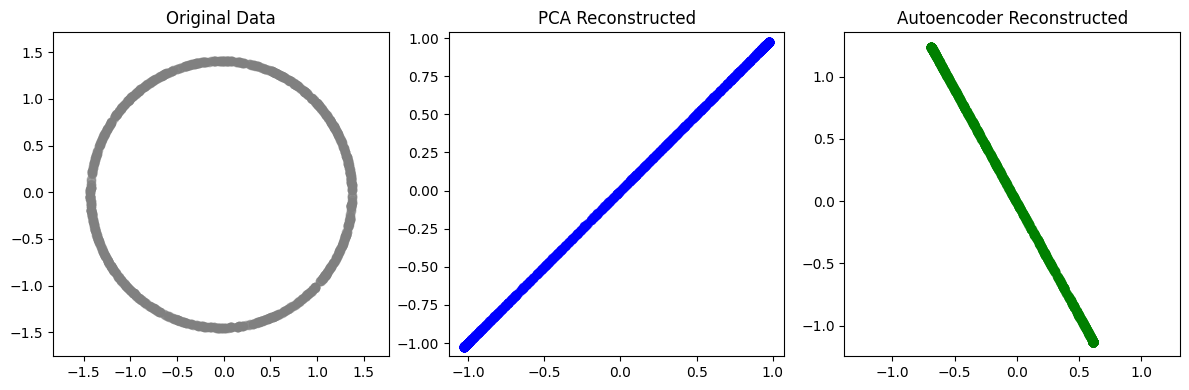

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Data")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', alpha=0.5)
plt.axis('equal')

plt.subplot(1, 3, 2)
plt.title("PCA Reconstructed")
plt.scatter(X_pca_reconstructed[:, 0], X_pca_reconstructed[:, 1], c='blue', alpha=0.5)
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.title("Autoencoder Reconstructed")
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c='green', alpha=0.5)
plt.axis('equal')

plt.tight_layout()
plt.show()


### Moon

PCA Reconstruction MSE: 0.287643


c:\Users\rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Autoencoder Reconstruction MSE: 0.290183


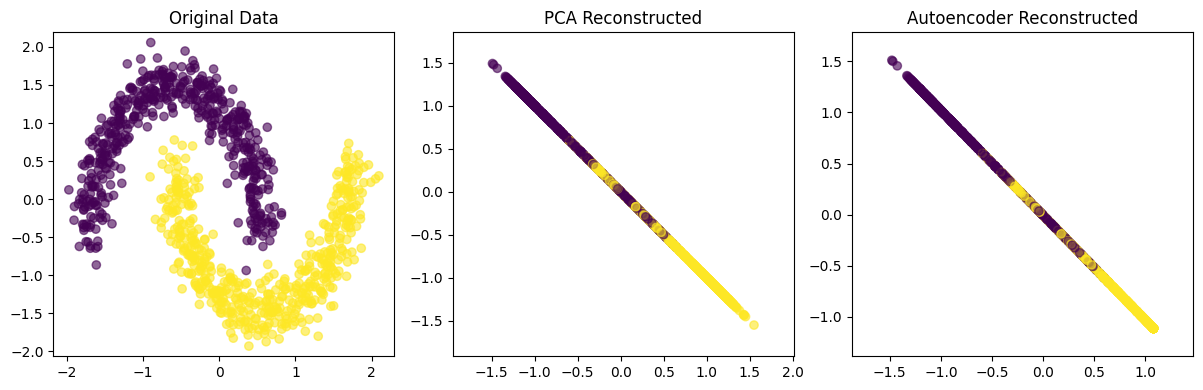

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

X, y = make_moons(n_samples=1000, noise=0.1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
X_pca_reconstructed = pca.inverse_transform(X_pca)
pca_mse = mean_squared_error(X_scaled, X_pca_reconstructed)
print(f"PCA Reconstruction MSE: {pca_mse:.6f}")

autoencoder = Sequential([
    Dense(1, activation='relu', input_shape=(2,)), 
    Dense(2)                                      
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=32, verbose=0)

X_autoencoded = autoencoder.predict(X_scaled)
ae_mse = mean_squared_error(X_scaled, X_autoencoded)
print(f"Autoencoder Reconstruction MSE: {ae_mse:.6f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Data")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.axis('equal')

plt.subplot(1, 3, 2)
plt.title("PCA Reconstructed")
plt.scatter(X_pca_reconstructed[:, 0], X_pca_reconstructed[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.title("Autoencoder Reconstructed")
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.axis('equal')

plt.tight_layout()
plt.show()


### Random Uniform

Text(0.5, 1.0, 'Generated Data')

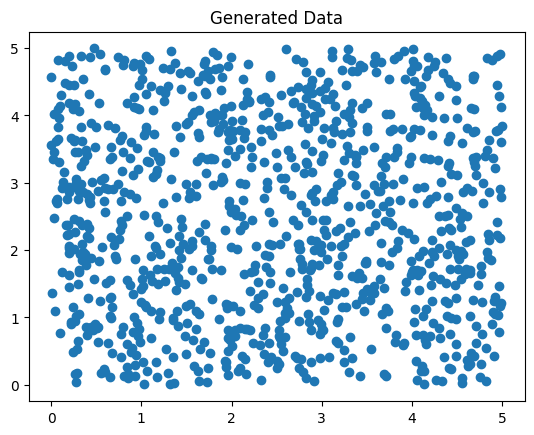

In [20]:
train = []
for i in range(1000):
    X = np.random.uniform(0,5)
    y = np.random.uniform(0,5)
    train.append([X, y])
train = np.array(train)

plt.scatter(train[:, 0], train[:, 1])
plt.title("Generated Data")


### Rectangle

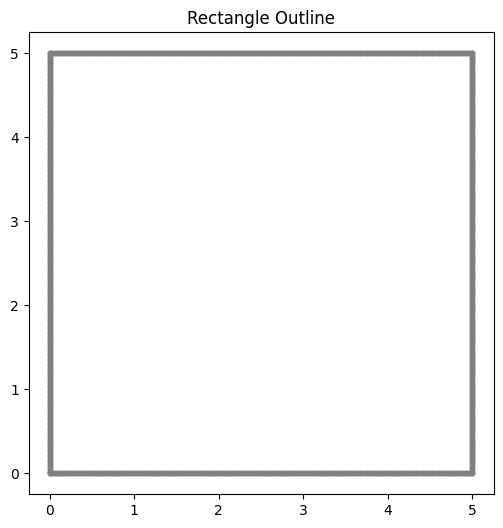

In [24]:
n = 250
x = np.linspace(0, 5, n)
y = np.linspace(0, 5, n)

rectangle = np.concatenate([
    np.stack([x, np.zeros(n)], axis=1),     
    np.stack([x, np.full(n, 5)], axis=1),   
    np.stack([np.zeros(n), y], axis=1),     
    np.stack([np.full(n, 5), y], axis=1)     
])

plt.figure(figsize=(6, 6))
plt.scatter(rectangle[:, 0], rectangle[:, 1], color='gray', s=10)
plt.title("Rectangle Outline")
plt.show()